<a href="https://colab.research.google.com/github/ilanmoshe52/Final_Project/blob/main/FIlter_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pywavelets

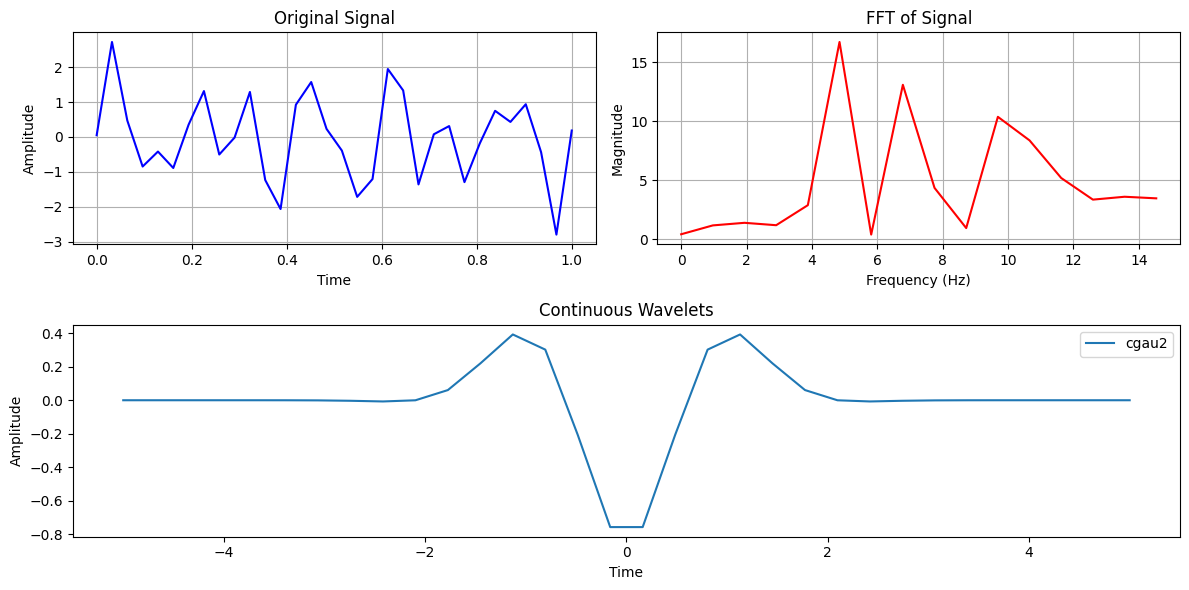

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a 32-sample discrete signal (e.g., a sine wave with some noise)
f1 = 5
f2 = 7
f3 = 10
np.random.seed(42)
t = np.linspace(0, 1, 32)
signal = np.sin(2 * np.pi * f1 * t) + 1*np.sin(2 * np.pi * f2 * t) +1*np.sin(2 * np.pi * f3 * t) + 0.1 * np.random.randn(32)

# Perform FFT
fft_result = np.fft.fft(signal)
#fft_freq = np.fft.fftfreq(len(signal))
fft_freq = np.fft.fftfreq(len(signal), d=t[1] - t[0])  # Compute the frequency axis correctly

# Plot the original signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t, signal, 'b')
plt.title('Original Signal')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(fft_freq[0:16], np.abs(fft_result[0:16]), 'r')
plt.title('FFT of Signal')
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot various types of wavelets
wavelet_names = pywt.wavelist(kind='continuous')  # Get the list of continuous wavelet names

plt.subplot(2, 1, 2)
for wavelet_name in wavelet_names[1:2]:  # Plot the first 6 wavelets
    wavelet = pywt.ContinuousWavelet(wavelet_name)
    psi, x = wavelet.wavefun(level=5)  # Generate the wavelet function
    plt.plot(x, psi, label=wavelet_name)

plt.title('Continuous Wavelets')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()


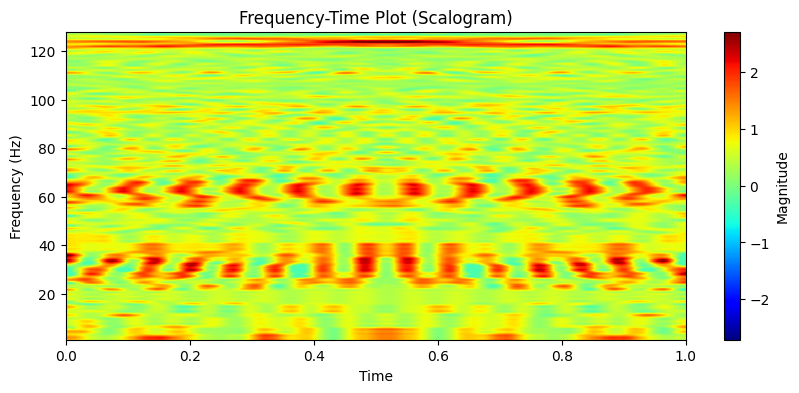

In [ ]:
# Perform wavelet decomposition
coefficients, frequencies = pywt.cwt(signal, np.arange(1, 150), 'shan')

# Plot frequency-time plot (scalogram)
plt.figure(figsize=(10, 4))
plt.imshow(np.abs(coefficients), extent=[0, 1, 1, 128], cmap='jet', aspect='auto', vmax=abs(coefficients).max(), vmin=-abs(coefficients).max(),interpolation='sinc')
plt.colorbar(label='Magnitude')
plt.title('Frequency-Time Plot (Scalogram)')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()


In [ ]:
wavelet_names = pywt.wavelist(kind='continuous')
wavelet_names

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


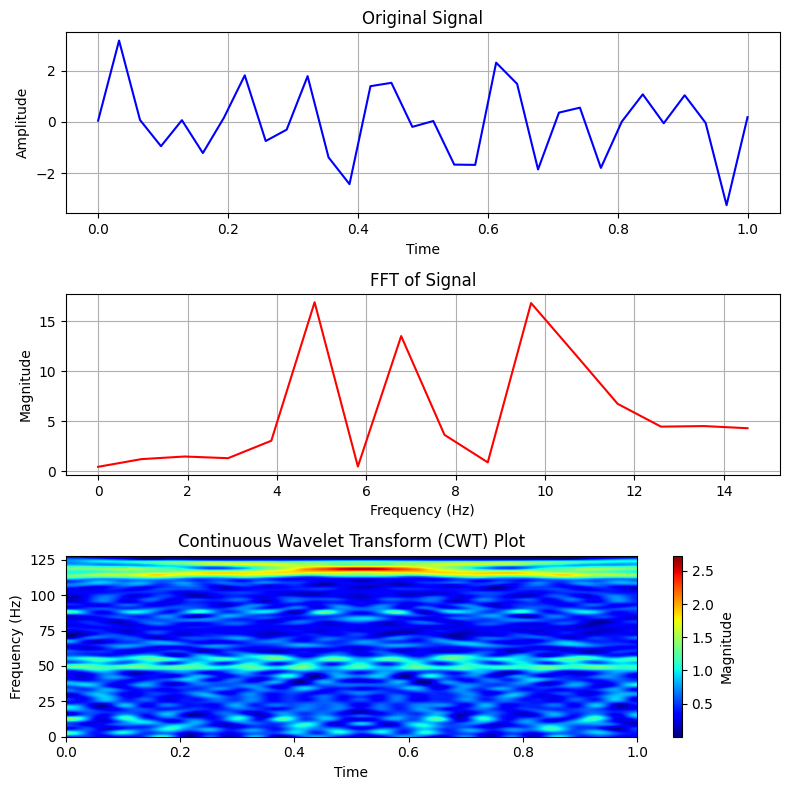

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a 32-sample discrete signal (e.g., a sine wave with some noise)
f1 = 5
f2 = 7
f3 = 10
np.random.seed(42)
t = np.linspace(0, 1, 32)
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) +1.5*np.sin(2 * np.pi * f3 * t) + 0.1 * np.random.randn(32)

# Perform FFT
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), d=t[1] - t[0])  # Compute the frequency axis correctly

# Define the sampling frequency
sampling_freq = len(t) / (t[-1] - t[0])

# Perform Continuous Wavelet Transform (CWT)
scales = np.arange(1, 64)  # Adjust the range of scales to capture the desired frequency range
cwt_result, frequencies = pywt.cwt(signal, scales, 'shan')

# Plot the original signal
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(t, signal, 'b')
plt.grid(True)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

#plot FFT
plt.subplot(3, 1, 2)
plt.plot(fft_freq[0:16], np.abs(fft_result[0:16]), 'r')
plt.title('FFT of Signal')
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot the Continuous Wavelet Transform (CWT) plot
plt.subplot(3, 1, 3)
#plt.imshow(np.abs(cwt_result), extent=[0, 1, frequencies[-1], frequencies[0]], cmap='jet', aspect='auto' , interpolation='sinc')
plt.imshow(np.abs(cwt_result), extent=[0, 1, 0, 128], cmap='jet', aspect='auto' , interpolation='bessel')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform (CWT) Plot')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()

plt.show()


In [ ]:
(frequencies) , sampling_freq

(array([0.8125    , 0.40625   , 0.27083333, 0.203125  , 0.1625    ,
        0.13541667, 0.11607143, 0.1015625 , 0.09027778, 0.08125   ,
        0.07386364, 0.06770833, 0.0625    , 0.05803571, 0.05416667,
        0.05078125, 0.04779412, 0.04513889, 0.04276316, 0.040625  ,
        0.03869048, 0.03693182, 0.03532609, 0.03385417, 0.0325    ,
        0.03125   , 0.03009259, 0.02901786, 0.02801724, 0.02708333,
        0.02620968, 0.02539062, 0.02462121, 0.02389706, 0.02321429,
        0.02256944, 0.02195946, 0.02138158, 0.02083333, 0.0203125 ,
        0.01981707, 0.01934524, 0.01889535, 0.01846591, 0.01805556,
        0.01766304, 0.01728723, 0.01692708, 0.01658163, 0.01625   ,
        0.01593137, 0.015625  , 0.01533019, 0.0150463 , 0.01477273,
        0.01450893, 0.01425439, 0.01400862, 0.01377119, 0.01354167,
        0.01331967, 0.01310484, 0.01289683, 0.01269531, 0.0125    ,
        0.01231061, 0.01212687, 0.01194853, 0.01177536, 0.01160714,
        0.01144366, 0.01128472, 0.01113014, 0.01